In [16]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import matplotlib as mpl
import matplotlib.animation as animation
from tqdm import tqdm

In [39]:
Nt = 11
Nx = 6
Ny = 6

x = np.linspace(0,1,Nx)
y = np.linspace(0,1,Nx)
t = np.linspace(0,1,Nt)

deltax = x[1] - x[0]
deltay = y[1] - y[0]
deltat = t[1] - t[0]

k=0.075
lambda_ = (k*deltat)/deltax**2
mu_ = (k*deltat)/deltay**2

print(lambda_,mu_)

0.18749999999999994 0.18749999999999994


In [40]:
def ui(x,y,t):
    
    return np.sin(np.pi*(x+y))

def H1(x,y,t):
    
    return np.exp(-2*np.pi**2 *t)*np.sin(np.pi*y)
def H2(x,y,t):
    
    return np.exp(-2*np.pi**2 *t)*np.sin(np.pi*x)
def H3(x,y,t):
    
    return np.exp(-2*np.pi**2 *t)*np.sin(np.pi*(y+1))

def H4(x,y,t):
    
    return np.exp(-2*np.pi**2 *t)*np.sin(np.pi*(x+1))




In [41]:
def InitU():
    
    u = np.zeros((Nt,Nx,Ny))
    
    u[0,:,:] = ui(x,y,0)
    u[:,0,:] = H1(x,y,0)
    u[:,-1,:] = H2(x,y,0)
    u[:,:,0] = H3(x,y,0)
    u[:,:,-1] = H4(x,y,0)
    
    return u

In [42]:
u = InitU()

In [43]:
#fig = plt.figure(figsize=(5,6))
#ax = fig.add_subplot(111, projection='3d')
#ax.plot_surface(X,Y,u[0,:,:],cmap='viridis')

In [44]:
def GetSolution():
    
    for l in tqdm(range(1,len(t))):
        u[l,0,:] = H1(x,y,t[l])
        u[l,-1,:] = H2(x,y,t[l])
        u[l,:,0] = H3(x,y,t[l])
        u[l,:,-1] = H4(x,y,t[l])
        for i in range(1,len(x)-1):
            for j in range(1,len(y)-1):
                u[l,i,j] = (1-2*lambda_-2*mu_)*u[l-1,i,j] + \
                lambda_*(u[l-1,i+1,j] + u[l-1,i-1,j]) + \
                mu_*(u[l-1,i,j+1] + u[l-1,i,j-1])
                

In [45]:
GetSolution()

100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 4740.93it/s]


<IPython.core.display.Javascript object>


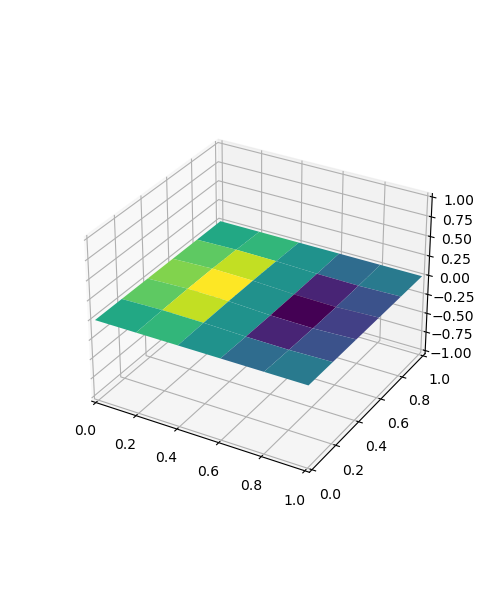

In [46]:
fig = plt.figure(figsize=(5,6))
ax = fig.add_subplot(111, projection='3d')

X,Y = np.meshgrid(x,y)

def init():
    
    
    ax.set_xlim3d(0,1)
    ax.set_ylim3d(0,1)
    ax.set_zlim3d(-1,1)

def Update(i):

    ax.clear()
    init()
    
    ax.plot_surface(X,Y,u[i,:,:],cmap='viridis')
    
Animation = animation.FuncAnimation(fig,Update,frames=len(t),init_func=init)

RuntimeError: Requested MovieWriter (ffmpeg) not available